In [1]:
import pandas as pd
import numpy as np 
import os
import glob
from os import listdir
from os.path import isfile, join
import scipy.io
from datetime import datetime, timedelta
import mat4py
import matplotlib.pyplot as plt
import plotly
# import plotly.plotly as py
import plotly.tools as tls
from plotly import graph_objs as go
from plotly.offline import *
import ntpath

In [2]:
header = ['Tower', 'Strom', 'Lon', 'Lat', 'time',
          'dir_050' , 'wspd_050',
          'dir_075' , 'wspd_075','dir_100' , 'wspd_100',
          'dir_125' , 'wspd_125','dir_150' , 'wspd_150',
          'u_ver_050', 'u_ver_075', 'u_ver_100', 'u_ver_125', 'u_ver_150']
# 'Height_050'
# 'Height_075'
# 'Height_100'
# 'Height_125'
# 'Height_150'
# 'USGill_Vertical'
# 'Height_050', 'Height_075', 'Height_100', 'Height_125', 'Height_150'
# 'U_Ver_050'
# 'U_Ver_075'
# 'U_Ver_100'
# 'U_Ver_125'
# 'U_Ver_150'

def dec_fcmp_single_f1(filename):
    """Decode the single FCMP file

    Args:
        filename (str): The path to the file
        height (str): height of the station

    Returns:
        decoded apndas

    """
    mat = mat4py.loadmat(filename)
    loc_pd = pd.DataFrame(columns=header)
    BlockAverage = mat['BlockAverage']
    Lat = mat['Lat']
    Location = mat['Location']
    Lon = mat['Lon']
    if isinstance(mat['StartTime'], float):
        StartTime = mat['StartTime']
    else:
        names = list(mat['StartTime'])
        StartTimes = [mat['StartTime'][j] for j in names]
        StartTimes = [x for x in StartTimes if str(x) != 'nan']
        StartTime = StartTimes[0] 
    
    Storm = mat['Storm']
    Tower = mat['Tower']
    dir_050 = np.array(mat['WDirection']['Height_050'])
    wspd_050 = np.array(mat['WSpeed']['Height_050'])
    dir_075 = np.array(mat['WDirection']['Height_075'])
    wspd_075 = np.array(mat['WSpeed']['Height_075'])
    dir_100 = np.array(mat['WDirection']['Height_100'])
    wspd_100 = np.array(mat['WSpeed']['Height_100'])
    dir_125 = np.array(mat['WDirection']['Height_125'])
    wspd_125 = np.array(mat['WSpeed']['Height_125'])
    dir_150 = np.array(mat['WDirection']['Height_150'])
    wspd_150 = np.array(mat['WSpeed']['Height_150'])
    
    # 'u_ver_050' 'u_ver_075' 'u_ver_100' 'u_ver_125' 'u_ver_150'
#     WVert
#     u_ver_050 = np.array(mat['USGill_Vertical']['Height_050'])
#     u_ver_075 = np.array(mat['USGill_Vertical']['Height_075'])
#     u_ver_100 = np.array(mat['USGill_Vertical']['Height_100'])
#     u_ver_125 = np.array(mat['USGill_Vertical']['Height_125'])
#     u_ver_150 = np.array(mat['USGill_Vertical']['Height_150'])
    u_ver_050 = np.array(mat['WVert']['Height_050'])
    u_ver_075 = np.array(mat['WVert']['Height_075'])
    u_ver_100 = np.array(mat['WVert']['Height_100'])
    u_ver_125 = np.array(mat['WVert']['Height_125'])
    u_ver_150 = np.array(mat['WVert']['Height_150'])
    
    pStartTime = datetime.fromordinal(int(StartTime)) + timedelta(days=StartTime%1) - timedelta(days = 366)
    time_vec = np.array([pStartTime + timedelta(seconds=int(i))  for i in np.arange(len(wspd_100))])
    Storm_vec = np.array([Storm]*len(wspd_100))
    Tower_vec = np.array([Tower]*len(wspd_100))
    Lon_vec = np.array([Lon]*len(wspd_100))
    Lat_vec = np.array([Lat]*len(wspd_100))   

    loc_pd['Tower'] = Tower_vec
    loc_pd['Strom'] = Storm_vec
    loc_pd['Lon'] = Lon_vec
    loc_pd['Lat'] = Lat_vec
    loc_pd['time'] = time_vec
    
    loc_pd['dir_050'] = dir_050
    loc_pd['wspd_050'] = wspd_050
    
    loc_pd['dir_075'] = dir_075
    loc_pd['wspd_075'] = wspd_075
    
    loc_pd['dir_100'] = dir_100
    loc_pd['wspd_100'] = wspd_100
    
    loc_pd['dir_125'] = dir_125
    loc_pd['wspd_125'] = wspd_125
    
    loc_pd['dir_150'] = dir_150
    loc_pd['wspd_150'] = wspd_150
    
    loc_pd['u_ver_050'] = u_ver_050
    loc_pd['u_ver_075'] = u_ver_075
    loc_pd['u_ver_100'] = u_ver_100
    loc_pd['u_ver_125'] = u_ver_125
    loc_pd['u_ver_150'] = u_ver_150
    
    return loc_pd


def dec_fcmp_single_f2(filename):
    """Decode the single FCMP file

    Args:
        filename (str): The path to the file
        height (str): height of the station

    Returns:
        decoded apndas

    """
    mat = mat4py.loadmat(filename)
    loc_pd = pd.DataFrame(columns=header)
    name = ntpath.basename(filename)
    Tower = name.split('_')[2]
    
    Lat = mat['GPS_Lat']
    Location = mat['Location']
    Lon = mat['GPS_Long']
    if isinstance(mat['DateNum_Start'], float):
        StartTime = mat['DateNum_Start']
    else:
        names = list(mat['DateNum_Start'])
        StartTimes = [mat['DateNum_Start'][j] for j in names]
        StartTimes = [x for x in StartTimes if str(x) != 'nan']
        StartTime = StartTimes[0] 
    
    Storm = mat['StormName']
#     Height_100
    dir_050 = np.array(mat['USGill_Dir']['Height_050'])
    wspd_050 = np.array(mat['USGill_Speed']['Height_050'])
    dir_075 = np.array(mat['USGill_Dir']['Height_075'])
    wspd_075 = np.array(mat['USGill_Speed']['Height_075'])
    dir_100 = np.array(mat['USGill_Dir']['Height_100'])
    wspd_100 = np.array(mat['USGill_Speed']['Height_100'])
    dir_125 = np.array(mat['USGill_Dir']['Height_125'])
    wspd_125 = np.array(mat['USGill_Speed']['Height_125'])
    dir_150 = np.array(mat['USGill_Dir']['Height_150'])
    wspd_150 = np.array(mat['USGill_Speed']['Height_150'])
    
    # 'u_ver_050' 'u_ver_075' 'u_ver_100' 'u_ver_125' 'u_ver_150'
    u_ver_050 = np.array(mat['USGill_Vertical']['Height_050'])
    u_ver_075 = np.array(mat['USGill_Vertical']['Height_075'])
    u_ver_100 = np.array(mat['USGill_Vertical']['Height_100'])
    u_ver_125 = np.array(mat['USGill_Vertical']['Height_125'])
    u_ver_150 = np.array(mat['USGill_Vertical']['Height_150'])
    
    pStartTime = datetime.fromordinal(int(StartTime)) + timedelta(days=StartTime%1) - timedelta(days = 366)
    time_vec = np.array([pStartTime + timedelta(seconds=int(i))  for i in np.arange(len(wspd_100))])
    Storm_vec = np.array([Storm]*len(wspd_100))
    Tower_vec = np.array([Tower]*len(wspd_100))
    Lon_vec = np.array([Lon]*len(wspd_100))
    Lat_vec = np.array([Lat]*len(wspd_100))   

    loc_pd['Tower'] = Tower_vec
    loc_pd['Strom'] = Storm_vec
    loc_pd['Lon'] = Lon_vec
    loc_pd['Lat'] = Lat_vec
    loc_pd['time'] = time_vec
    
    loc_pd['dir_050'] = dir_050
    loc_pd['wspd_050'] = wspd_050
    
    loc_pd['dir_075'] = dir_075
    loc_pd['wspd_075'] = wspd_075
    
    loc_pd['dir_100'] = dir_100
    loc_pd['wspd_100'] = wspd_100
    
    loc_pd['dir_125'] = dir_125
    loc_pd['wspd_125'] = wspd_125
    
    loc_pd['dir_150'] = dir_150
    loc_pd['wspd_150'] = wspd_150
    
    loc_pd['u_ver_050'] = u_ver_050
    loc_pd['u_ver_075'] = u_ver_075
    loc_pd['u_ver_100'] = u_ver_100
    loc_pd['u_ver_125'] = u_ver_125
    loc_pd['u_ver_150'] = u_ver_150
    
    return loc_pd


def dec_fcmp_single_f3(filename):
    """Decode the single FCMP file

    Args:
        filename (str): The path to the file
        height (str): height of the station

    Returns:
        decoded apndas

    """
    mat = mat4py.loadmat(filename)
    loc_pd = pd.DataFrame(columns=header)
    BlockAverage = mat['BlockAverage']
    Lat = mat['Lat']
    Location = mat['Location']
    Lon = mat['Lon']
    if isinstance(mat['StartTime'], float):
        StartTime = mat['StartTime']
    else:
        names = list(mat['StartTime'])
        StartTimes = [mat['StartTime'][j] for j in names]
        StartTimes = [x for x in StartTimes if str(x) != 'nan']
        StartTime = StartTimes[0] 
    
    Storm = mat['Storm']
    Tower = mat['Tower']
    dir_050 = np.array(mat['WDirection']['Height_050'])
    wspd_050 = np.array(mat['WSpeed']['Height_050'])
#     dir_075 = np.array(mat['WDirection']['Height_075'])
#     wspd_075 = np.array(mat['WSpeed']['Height_075'])
    dir_100 = np.array(mat['WDirection']['Height_100'])
    wspd_100 = np.array(mat['WSpeed']['Height_100'])
#     dir_125 = np.array(mat['WDirection']['Height_125'])
#     wspd_125 = np.array(mat['WSpeed']['Height_125'])
#     dir_150 = np.array(mat['WDirection']['Height_150'])
#     wspd_150 = np.array(mat['WSpeed']['Height_150'])

    u_ver_050 = np.array(mat['WVert']['Height_050'])
    u_ver_100 = np.array(mat['WVert']['Height_100'])
    
    pStartTime = datetime.fromordinal(int(StartTime)) + timedelta(days=StartTime%1) - timedelta(days = 366)
    time_vec = np.array([pStartTime + timedelta(seconds=int(i))  for i in np.arange(len(wspd_100))])
    Storm_vec = np.array([Storm]*len(wspd_100))
    Tower_vec = np.array([Tower]*len(wspd_100))
    Lon_vec = np.array([Lon]*len(wspd_100))
    Lat_vec = np.array([Lat]*len(wspd_100))   

    loc_pd['Tower'] = Tower_vec
    loc_pd['Strom'] = Storm_vec
    loc_pd['Lon'] = Lon_vec
    loc_pd['Lat'] = Lat_vec
    loc_pd['time'] = time_vec
    
    loc_pd['dir_050'] = dir_050
    loc_pd['wspd_050'] = wspd_050
    
#     loc_pd['dir_075'] = dir_075
#     loc_pd['wspd_075'] = wspd_075
    
    loc_pd['dir_100'] = dir_100
    loc_pd['wspd_100'] = wspd_100
    
    loc_pd['u_ver_050'] = u_ver_050
    loc_pd['u_ver_100'] = u_ver_100
    
#     loc_pd['dir_125'] = dir_125
#     loc_pd['wspd_125'] = wspd_125
    
#     loc_pd['dir_150'] = dir_150
#     loc_pd['wspd_150'] = wspd_150
    
    return loc_pd


def dec_fcmp_dir(station_dir, format_type='format_1'):
    """Decodes all FCMP files from the directory

    Args:
        station_dir (str): path to the dir for 
        the all files for the tower
        format (str): height of the station

    Returns:
        decoded apndas

    """
    
    ev_files = listdir(station_dir)
    ev_files = [join(station_dir, i) for i in ev_files]
    glob_pd = pd.DataFrame(columns=header)
    if format_type=='format_1':
        for ith_file in ev_files:
            loc_pd = dec_fcmp_single_f1(ith_file)
            frames = [glob_pd, loc_pd]
            glob_pd = pd.concat(frames)
            
    elif format_type=='format_2':
        for ith_file in ev_files:
            try:
                loc_pd = dec_fcmp_single_f2(ith_file)
                frames = [glob_pd, loc_pd]
                glob_pd = pd.concat(frames)
            except:
                print("An exception occurred: ", ith_file)
    elif format_type=='format_3':
        for ith_file in ev_files:
            try:
                loc_pd = dec_fcmp_single_f3(ith_file)
                frames = [glob_pd, loc_pd]
                glob_pd = pd.concat(frames)
            except:
                print("An exception occurred: ", ith_file)
    
    return glob_pd


def plot_all(fl_name, full_path, out_dir, gl_pd, ch_dir, dx, height='10'):
    """Decodes all FCMP files from the directory

    Args:
        station_dir (str): path to the dir for 
        the all files for the tower
        format (str): height of the station

    Returns:
        decoded apndas

    """
    if height=='5':
        direc = 'dir_050' 
        wpd = 'wspd_050'
    elif height=='7.5':
        direc = 'dir_075'
        wpd = 'wspd_075'
    elif height=='10':
        direc = 'dir_100'  
        wpd = 'wspd_100'
    elif height=='12.5':
        direc = 'dir_125'  
        wpd = 'wspd_125'
    elif height=='15':
        direc = 'dir_150' 
        wpd = 'wspd_150'
    else:
        raise ValueError
    
    low_dir = ch_dir -dx
    hi_dir = ch_dir +dx
    
    new_dir = join(out_dir, fl_name)
    if not os.path.exists(new_dir):
        os.makedirs(new_dir)
    all_csv = join(new_dir, 'data_all') + '.csv'
    min_csv = join(new_dir, 'data_1min') + '.csv'

    html_name_all = join(new_dir, fl_name) + '_all.html'
    jpeg_name_all = join(new_dir, fl_name) + '_all.jpeg'
    csv_name_all = join(new_dir, fl_name) + '_all.csv'

    html_name_1min = join(new_dir, fl_name) + '_1min.html'
    jpeg_name_1min = join(new_dir, fl_name) + '_1min.jpeg'

    gl_pd = gl_pd[(gl_pd[direc]>low_dir)&(gl_pd[direc]<hi_dir)]
    gl_pd = gl_pd.reset_index(drop=True)
#     gl_pd['time_diff'] = 0
    time_diff = list()
    time_diff.append((gl_pd['time'][1] - gl_pd['time'][1]).seconds)
    for i in range(gl_pd.shape[0] - 1):
        time_diff.append((gl_pd['time'][i+1] - gl_pd['time'][i]).seconds)
    time_diff = np.array(time_diff)
    gl_pd['time_diff'] = time_diff
    # gl_pd = gl_pd[time_diff==1]
    gl_pd = gl_pd.reset_index(drop=True)
    gl_pd.to_csv(csv_name_all, index=False)

    fig = plt.figure(figsize=(30, 10))
    x=gl_pd['time'].values
    y=gl_pd[wpd].values
    ax = fig.add_subplot(311)
    ax.plot(x,y, 'or')
    ax.set_title('Wind speed raw (m/s)')

    x=gl_pd['time'].values
    y=gl_pd[direc].values
    ax = fig.add_subplot(312)
    ax.plot(x,y, '*b')
    ax.set_title('Wind direction')

    x=gl_pd['time'].values
    y=time_diff
    ax = fig.add_subplot(313)
    ax.plot(x,y, '*k')
    ax.set_title('time_diff time_diff')
    ax.set_ylim([0, 5])

    plt.savefig(jpeg_name_all, format='jpg', dpi=300)
    
#     plotly_fig = tls.mpl_to_plotly( fig )
#     plotly.offline.plot(plotly_fig, filename=html_name_all)
    
    print('Printing the 60 sec intervals')
    for i in range(gl_pd.shape[0] - 60):
        cum_con = np.sum(gl_pd['time_diff'][(i):(i+60)])
        if cum_con ==60:
            print(cum_con, gl_pd['time'][i], [i, i + 60])
    return gl_pd


def plot_1min(start_time, fl_name, full_path, out_dir, gl_pd, height='10', time_inc=60):
    """Decodes all FCMP files from the directory

    Args:
        station_dir (str): path to the dir for 
        the all files for the tower
        format (str): height of the station

    Returns:
        decoded apndas

    """
    end_time = start_time + timedelta(seconds=60)
    
    if height=='5':
        direc = 'dir_050' 
        wpd = 'wspd_050'
    elif height=='7.5':
        direc = 'dir_075'
        wpd = 'wspd_075'
    elif height=='10':
        direc = 'dir_100'  
        wpd = 'wspd_100'
    elif height=='12.5':
        direc = 'dir_125'  
        wpd = 'wspd_125'
    elif height=='15':
        direc = 'dir_150' 
        wpd = 'wspd_150'
    else:
        raise ValueError
    
    new_dir = join(out_dir, fl_name)
    if not os.path.exists(new_dir):
        os.makedirs(new_dir)
        
    html_name_1min = join(new_dir, fl_name) + '_1min.html'
    jpeg_name_1min = join(new_dir, fl_name) + '_1min.jpeg'
    csv_name_1min = join(new_dir, fl_name) + '_1min.csv'
    
    gl_pd = gl_pd[(gl_pd['time']>start_time)&(gl_pd['time']<end_time)]
    gl_pd = gl_pd.reset_index(drop=True)

    gl_pd.to_csv(csv_name_1min, index=False)

    fig = plt.figure(figsize=(30, 10))
    x=gl_pd['time'].values
    y=gl_pd[wpd].values
    ax = fig.add_subplot(211)
    ax.plot(x,y, 'or')
    ax.set_title('Wind speed raw (m/s)')

    x=gl_pd['time'].values
    y=gl_pd[direc].values
    ax = fig.add_subplot(212)
    ax.plot(x,y, '*b')
    ax.set_title('Wind direction')

    plt.savefig(jpeg_name_1min, format='jpg', dpi=300)    
    plotly_fig = tls.mpl_to_plotly( fig )
    plotly.offline.plot(plotly_fig, filename=html_name_1min)

    return gl_pd


def roughness_es(gl_pd, height='10', heuristic=True):
    """Estimate roughness

    Args:
        gl_pd: 
        height:
        heuristic:

    Returns:
        estimate roughness

    """

    if height=='5':
        direc = gl_pd['dir_050'] 
        wpd = gl_pd['wspd_050']
        w = gl_pd['u_ver_050']
        z = 5
    elif height=='7.5':
        direc = gl_pd['dir_075']
        wpd = gl_pd['wspd_075']
        w = gl_pd['u_ver_075']
        z = 7.5
    elif height=='10':
        direc = gl_pd['dir_100']  
        wpd = gl_pd['wspd_100']
        w = gl_pd['u_ver_100']
        z = 10
    elif height=='12.5':
        direc = gl_pd['dir_125']  
        wpd = gl_pd['wspd_125']
        w = gl_pd['u_ver_125']
        z = 12.5
    elif height=='15':
        direc = gl_pd['dir_150'] 
        wpd = gl_pd['wspd_150']
        w = gl_pd['u_ver_150']
        z = 15

    v = np.array([np.cos(np.deg2rad(deg))*speed for speed, deg in zip(wpd, direc)])
    u = np.array([np.sin(np.deg2rad(deg))*speed for speed, deg in zip(wpd, direc)])

    w_mean = np.mean(w)
    u_mean = np.mean(u)
    v_mean = np.mean(v)

    w_prim = np.array([ithw-w_mean for ithw in w]) 
    u_prim = np.array([ithu-u_mean for ithu in u])
    v_prim =np.array([ithv-v_mean for ithv in v])

#     uw_dash = np.mean(np.multiply(u_prim, w_prim)**2)
#     vw_dash = np.mean(np.multiply(v_prim, w_prim)**2)

    uw_dash = np.mean(np.multiply(u_prim, w_prim))
    vw_dash = np.mean(np.multiply(v_prim, w_prim))

    u_star = (uw_dash**2 + vw_dash**2)**(0.25)


    von_karman = 0.4
    u_wind = np.array([(wth**2+uth**2+vth**2)**(0.5) for wth, uth, vth in zip(w, u, v)])
    mult = np.exp(-(np.mean(u_wind)*von_karman)/u_star)
#     mult = np.exp(-(np.mean(wpd)*von_karman)/u_star)
    # print(u_star)
#     h_dash = 5
# #     print(2.5*mult)
#     if heuristic:
#         z0 = (z*mult - h_dash*mult)/(1-2.5*mult)  
#     else:
#         z0 = z*mult
    z0 = z*mult
    return z0 


def roughness_out(filename, z0, dx, ch_dir, fl_name, start_time, height, heuristic, append=True):
    """
    Save the output to the file

    """
    heuristic_str = str(heuristic)
    date_run = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    if append:
        ap = 'a'
    else:
        ap = 'w'
#     print('z0: ' + str(z0))
    with open(filename, ap) as file:
        file.write('########## ' + date_run + ' #####################\n')
        file.write('file name: ' + fl_name + '\n')
        file.write('z0: ' + str(z0) + '\n')
        file.write('angle: ' + str(ch_dir) + '\n')
        file.write('dx: ' + str(dx) + '\n')
        file.write('height: ' + height + '\n')
        file.write('heuristic: ' + heuristic_str + '\n')
        file.write('####################################################\n')

In [3]:
# Local Machine
# dir_path = r'C:\Users\Grzegorz\Dropbox\LULC_project\task_2\data'
# out_dir = r'C:\Users\Grzegorz\Desktop\FCMP'

# Office
# dir_path = r'C:\Users\gkaka\Dropbox\LULC_project\task_2\data'
dir_path = r'C:\Users\gkaka\Dropbox\LULC_project\task_2\data_v'
out_dir = r'C:\Users\gkaka\Desktop\FCMP'
filename_out = r'C:\Users\gkaka\Desktop\FCMP\z0_summary.txt'

Printing the 60 sec intervals
60 2012-08-28 13:52:25.000007 [1426, 1486]
60 2012-08-28 13:52:26.000007 [1427, 1487]
60 2012-08-28 13:52:27.000007 [1428, 1488]
60 2012-08-28 13:52:28.000007 [1429, 1489]
60 2012-08-28 13:52:29.000007 [1430, 1490]
60 2012-08-28 13:52:30.000007 [1431, 1491]
60 2012-08-28 13:52:31.000007 [1432, 1492]
60 2012-08-28 13:52:32.000007 [1433, 1493]
60 2012-08-28 13:52:33.000007 [1434, 1494]
60 2012-08-28 15:17:42.999986 [5718, 5778]
60 2012-08-28 15:17:43.999986 [5719, 5779]
60 2012-08-28 15:17:44.999986 [5720, 5780]
60 2012-08-28 15:17:45.999986 [5721, 5781]
60 2012-08-28 15:17:46.999986 [5722, 5782]
60 2012-08-28 15:17:47.999986 [5723, 5783]
60 2012-08-28 15:17:48.999986 [5724, 5784]
60 2012-08-28 15:17:49.999986 [5725, 5785]
60 2012-08-28 15:17:50.999986 [5726, 5786]
60 2012-08-28 15:17:51.999986 [5727, 5787]
60 2012-08-28 15:17:52.999986 [5728, 5788]
60 2012-08-28 15:17:53.999986 [5729, 5789]
60 2012-08-28 15:17:54.999986 [5730, 5790]
60 2012-08-28 15:17:55.9

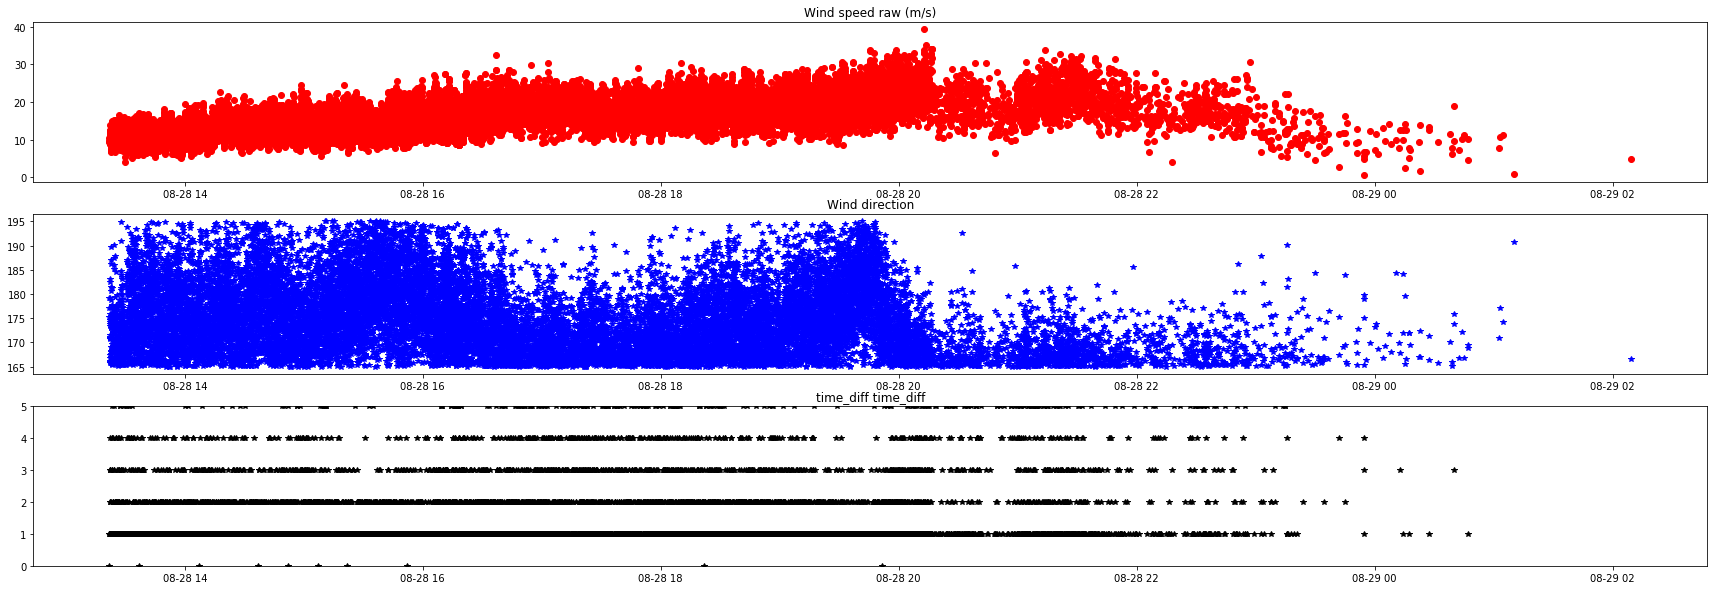

In [4]:
# 2012IssacT2	180
dx = 15
ch_dir = 180

fl_name = '2012_Isaac_T2_check'
full_path = join(dir_path, fl_name)
gl_pd = dec_fcmp_dir(station_dir=full_path)

gl_pd = plot_all(fl_name=fl_name, full_path=full_path, out_dir=out_dir, 
                 gl_pd=gl_pd, ch_dir=ch_dir, dx=dx)

In [5]:
start_time=datetime(2012,8,28,19,44,46)
gl_pd = plot_1min(start_time=start_time, fl_name=fl_name, full_path=full_path, out_dir=out_dir, gl_pd=gl_pd, height='10', time_inc=60)

In [6]:
height='5'
heuristic=False
z0 = roughness_es(gl_pd=gl_pd, height=height, heuristic=heuristic)
print('5 z0: ', z0)
roughness_out(filename=filename_out, z0=z0, dx=dx, ch_dir=ch_dir, 
              fl_name=fl_name, start_time=start_time, height=height, heuristic=heuristic, append=True)

height='7.5'
heuristic=False
z0 = roughness_es(gl_pd=gl_pd, height=height, heuristic=heuristic)
print('7.5 z0: ', z0)
roughness_out(filename=filename_out, z0=z0, dx=dx, ch_dir=ch_dir, 
              fl_name=fl_name, start_time=start_time, height=height, heuristic=heuristic, append=True)

height='10'
heuristic=False
z0 = roughness_es(gl_pd=gl_pd, height=height, heuristic=heuristic)
print('10 z0: ', z0)
roughness_out(filename=filename_out, z0=z0, dx=dx, ch_dir=ch_dir, 
              fl_name=fl_name, start_time=start_time, height=height, heuristic=heuristic, append=True)

height='12.5'
heuristic=False
z0 = roughness_es(gl_pd=gl_pd, height=height, heuristic=heuristic)
print('12.5 z0: ', z0)
roughness_out(filename=filename_out, z0=z0, dx=dx, ch_dir=ch_dir, 
              fl_name=fl_name, start_time=start_time, height=height, heuristic=heuristic, append=True)

height='15'
heuristic=False
z0 = roughness_es(gl_pd=gl_pd, height=height, heuristic=heuristic)
print('12.5 z0: ', z0)
roughness_out(filename=filename_out, z0=z0, dx=dx, ch_dir=ch_dir, 
              fl_name=fl_name, start_time=start_time, height=height, heuristic=heuristic, append=True)

5 z0:  0.013691341319705286
7.5 z0:  0.052801937516008014
10 z0:  0.13589953278883257
12.5 z0:  0.23002805690464384
12.5 z0:  0.3457209586149138


Printing the 60 sec intervals
60 2012-08-29 04:18:24.999993 [35988, 36048]
60 2012-08-29 04:18:25.999993 [35989, 36049]
60 2012-08-29 04:18:26.999993 [35990, 36050]
60 2012-08-29 04:18:27.999993 [35991, 36051]


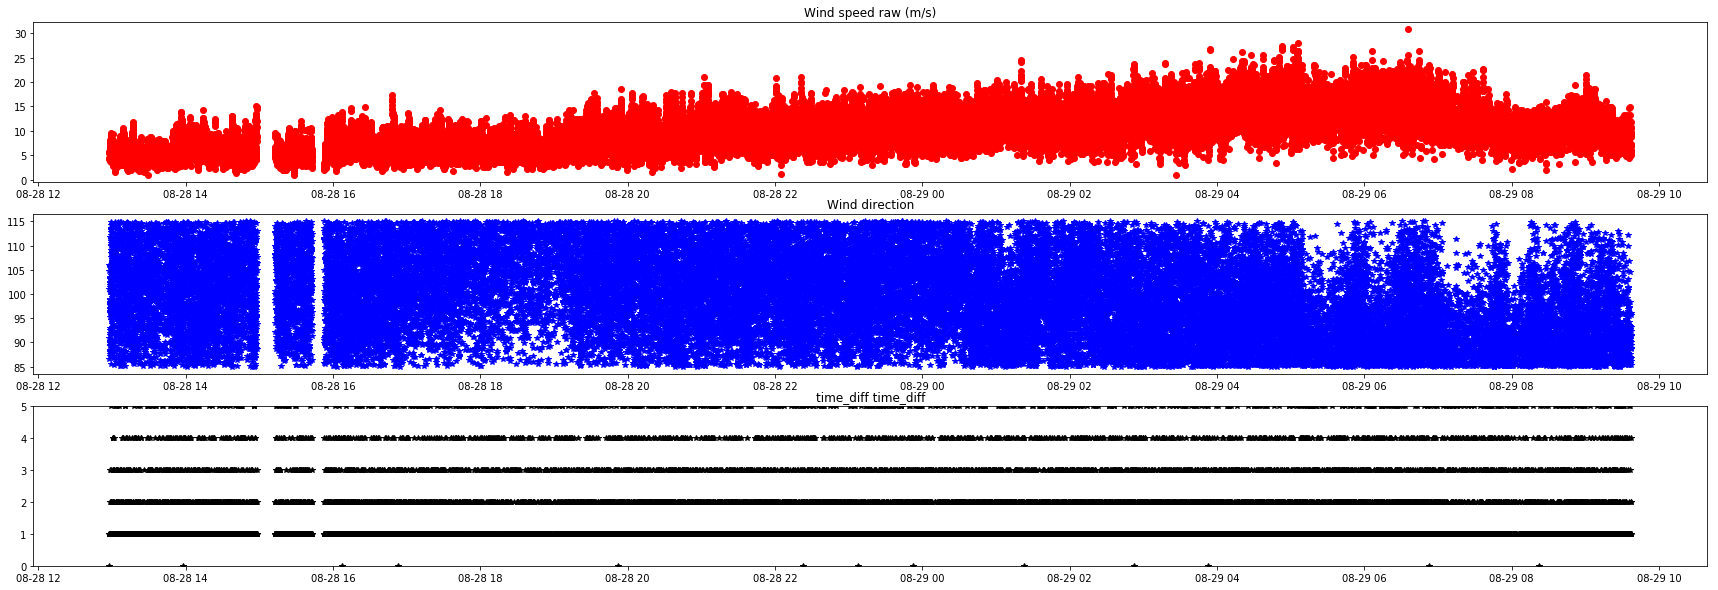

In [7]:
# 2012IssacT3	100
dx = 15
ch_dir = 100

fl_name = '2012_Isaac_T3'
full_path = join(dir_path, fl_name)
gl_pd = dec_fcmp_dir(station_dir=full_path, format_type='format_1')

gl_pd = plot_all(fl_name=fl_name, full_path=full_path, out_dir=out_dir, 
                 gl_pd=gl_pd, ch_dir=ch_dir, dx=dx)

In [8]:
start_time=datetime(2012,8,29,4,18,24)
gl_pd = plot_1min(start_time=start_time, fl_name=fl_name, full_path=full_path, out_dir=out_dir, gl_pd=gl_pd, height='10', time_inc=60)

In [9]:
height='5'
heuristic=False
z0 = roughness_es(gl_pd=gl_pd, height=height, heuristic=heuristic)
print('5 z0: ', z0)
roughness_out(filename=filename_out, z0=z0, dx=dx, ch_dir=ch_dir, 
              fl_name=fl_name, start_time=start_time, height=height, heuristic=heuristic, append=True)

height='7.5'
heuristic=False
z0 = roughness_es(gl_pd=gl_pd, height=height, heuristic=heuristic)
print('7.5 z0: ', z0)
roughness_out(filename=filename_out, z0=z0, dx=dx, ch_dir=ch_dir, 
              fl_name=fl_name, start_time=start_time, height=height, heuristic=heuristic, append=True)

height='10'
heuristic=False
z0 = roughness_es(gl_pd=gl_pd, height=height, heuristic=heuristic)
print('10 z0: ', z0)
roughness_out(filename=filename_out, z0=z0, dx=dx, ch_dir=ch_dir, 
              fl_name=fl_name, start_time=start_time, height=height, heuristic=heuristic, append=True)

height='12.5'
heuristic=False
z0 = roughness_es(gl_pd=gl_pd, height=height, heuristic=heuristic)
print('12.5 z0: ', z0)
roughness_out(filename=filename_out, z0=z0, dx=dx, ch_dir=ch_dir, 
              fl_name=fl_name, start_time=start_time, height=height, heuristic=heuristic, append=True)

height='15'
heuristic=False
z0 = roughness_es(gl_pd=gl_pd, height=height, heuristic=heuristic)
print('12.5 z0: ', z0)
roughness_out(filename=filename_out, z0=z0, dx=dx, ch_dir=ch_dir, 
              fl_name=fl_name, start_time=start_time, height=height, heuristic=heuristic, append=True)

5 z0:  0.038497745757921954
7.5 z0:  nan
10 z0:  0.07099983092307385
12.5 z0:  0.19796873443133806
12.5 z0:  0.25949611393670835


Printing the 60 sec intervals
60 2012-10-29 20:17:50.000004 [767, 827]
60 2012-10-29 20:17:51.000004 [768, 828]
60 2012-10-29 20:17:52.000004 [769, 829]
60 2012-10-29 20:17:53.000004 [770, 830]
60 2012-10-29 20:17:54.000004 [771, 831]
60 2012-10-29 20:17:55.000004 [772, 832]
60 2012-10-29 20:17:56.000004 [773, 833]
60 2012-10-29 20:17:57.000004 [774, 834]
60 2012-10-29 20:17:58.000004 [775, 835]
60 2012-10-29 20:17:59.000004 [776, 836]
60 2012-10-29 20:18:00.000004 [777, 837]
60 2012-10-29 20:18:01.000004 [778, 838]
60 2012-10-29 20:18:02.000004 [779, 839]
60 2012-10-29 20:18:03.000004 [780, 840]
60 2012-10-29 20:18:04.000004 [781, 841]
60 2012-10-29 20:18:05.000004 [782, 842]
60 2012-10-29 20:18:06.000004 [783, 843]
60 2012-10-29 20:18:07.000004 [784, 844]
60 2012-10-29 20:18:08.000004 [785, 845]
60 2012-10-29 20:18:09.000004 [786, 846]
60 2012-10-29 20:18:10.000004 [787, 847]
60 2012-10-29 20:18:11.000004 [788, 848]
60 2012-10-29 20:18:12.000004 [789, 849]
60 2012-10-29 20:18:13.0000

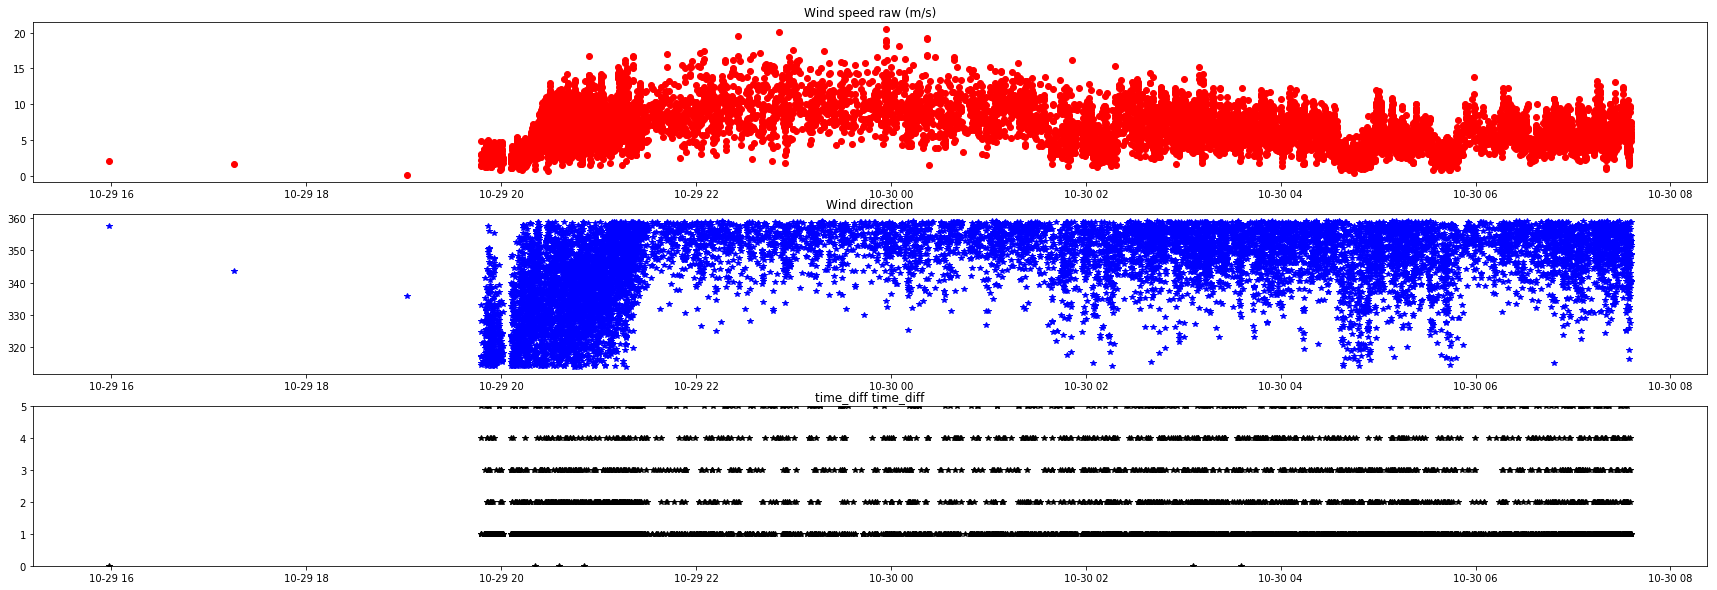

In [10]:
# 2012SandyT3	355
dx = 22.5
ch_dir = 359 - dx

fl_name = '2012_Sandy_T3'
full_path = join(dir_path, fl_name)
gl_pd = dec_fcmp_dir(station_dir=full_path, format_type='format_1')

gl_pd = plot_all(fl_name=fl_name, full_path=full_path, out_dir=out_dir, 
                 gl_pd=gl_pd, ch_dir=ch_dir, dx=dx)

In [11]:
# 2012-10-29 20:19:00.000004
start_time=datetime(2012,10,29,20,19,0)
gl_pd = plot_1min(start_time=start_time, fl_name=fl_name, full_path=full_path, out_dir=out_dir, gl_pd=gl_pd, height='10', time_inc=60)

In [12]:
height='5'
heuristic=False
z0 = roughness_es(gl_pd=gl_pd, height=height, heuristic=heuristic)
print('5 z0: ', z0)
roughness_out(filename=filename_out, z0=z0, dx=dx, ch_dir=ch_dir, 
              fl_name=fl_name, start_time=start_time, height=height, heuristic=heuristic, append=True)

height='7.5'
heuristic=False
z0 = roughness_es(gl_pd=gl_pd, height=height, heuristic=heuristic)
print('7.5 z0: ', z0)
roughness_out(filename=filename_out, z0=z0, dx=dx, ch_dir=ch_dir, 
              fl_name=fl_name, start_time=start_time, height=height, heuristic=heuristic, append=True)

height='10'
heuristic=False
z0 = roughness_es(gl_pd=gl_pd, height=height, heuristic=heuristic)
print('10 z0: ', z0)
roughness_out(filename=filename_out, z0=z0, dx=dx, ch_dir=ch_dir, 
              fl_name=fl_name, start_time=start_time, height=height, heuristic=heuristic, append=True)

height='12.5'
heuristic=False
z0 = roughness_es(gl_pd=gl_pd, height=height, heuristic=heuristic)
print('12.5 z0: ', z0)
roughness_out(filename=filename_out, z0=z0, dx=dx, ch_dir=ch_dir, 
              fl_name=fl_name, start_time=start_time, height=height, heuristic=heuristic, append=True)

height='15'
heuristic=False
z0 = roughness_es(gl_pd=gl_pd, height=height, heuristic=heuristic)
print('12.5 z0: ', z0)
roughness_out(filename=filename_out, z0=z0, dx=dx, ch_dir=ch_dir, 
              fl_name=fl_name, start_time=start_time, height=height, heuristic=heuristic, append=True)

5 z0:  0.008061309742815218
7.5 z0:  0.009927712972900569
10 z0:  0.011765105588917087
12.5 z0:  0.00220337744629921
12.5 z0:  0.062250268663950434


An exception occurred:  C:\Users\gkaka\Dropbox\LULC_project\task_2\data_v\2016_Hermine_T3\Hermine_2016_T3_1Hz_053.mat
An exception occurred:  C:\Users\gkaka\Dropbox\LULC_project\task_2\data_v\2016_Hermine_T3\Hermine_2016_T3_1Hz_054.mat
An exception occurred:  C:\Users\gkaka\Dropbox\LULC_project\task_2\data_v\2016_Hermine_T3\Hermine_2016_T3_1Hz_055.mat
An exception occurred:  C:\Users\gkaka\Dropbox\LULC_project\task_2\data_v\2016_Hermine_T3\Hermine_2016_T3_1Hz_056.mat
An exception occurred:  C:\Users\gkaka\Dropbox\LULC_project\task_2\data_v\2016_Hermine_T3\Hermine_2016_T3_1Hz_057.mat
An exception occurred:  C:\Users\gkaka\Dropbox\LULC_project\task_2\data_v\2016_Hermine_T3\Hermine_2016_T3_1Hz_058.mat
An exception occurred:  C:\Users\gkaka\Dropbox\LULC_project\task_2\data_v\2016_Hermine_T3\Hermine_2016_T3_1Hz_059.mat
An exception occurred:  C:\Users\gkaka\Dropbox\LULC_project\task_2\data_v\2016_Hermine_T3\Hermine_2016_T3_1Hz_060.mat
An exception occurred:  C:\Users\gkaka\Dropbox\LULC_proj

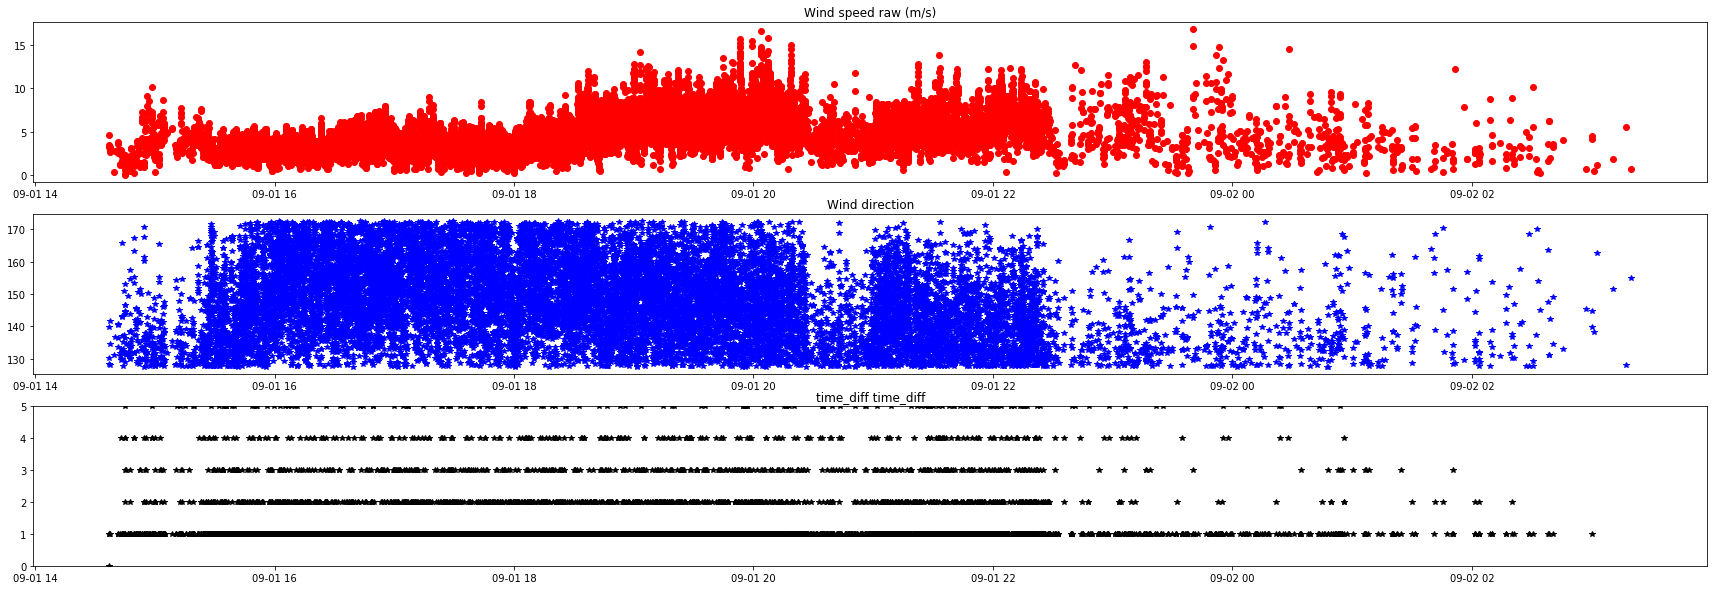

In [13]:
# 2016HERMINET3	150 or 355
dx = 22.5
ch_dir = 150

fl_name = '2016_Hermine_T3'
full_path = join(dir_path, fl_name)
gl_pd = dec_fcmp_dir(station_dir=full_path, format_type='format_2')

gl_pd = plot_all(fl_name=fl_name, full_path=full_path, out_dir=out_dir, 
                 gl_pd=gl_pd, ch_dir=ch_dir, dx=dx)

In [14]:
# 2016-09-01 18:10:33.840002
start_time=datetime(2016,9,1,18,10,33)
gl_pd = plot_1min(start_time=start_time, fl_name=fl_name, full_path=full_path, out_dir=out_dir, gl_pd=gl_pd, height='10', time_inc=60)

In [15]:
height='5'
heuristic=False
z0 = roughness_es(gl_pd=gl_pd, height=height, heuristic=heuristic)
print('5 z0: ', z0)
roughness_out(filename=filename_out, z0=z0, dx=dx, ch_dir=ch_dir, 
              fl_name=fl_name, start_time=start_time, height=height, heuristic=heuristic, append=True)

height='7.5'
heuristic=False
z0 = roughness_es(gl_pd=gl_pd, height=height, heuristic=heuristic)
print('7.5 z0: ', z0)
roughness_out(filename=filename_out, z0=z0, dx=dx, ch_dir=ch_dir, 
              fl_name=fl_name, start_time=start_time, height=height, heuristic=heuristic, append=True)

height='10'
heuristic=False
z0 = roughness_es(gl_pd=gl_pd, height=height, heuristic=heuristic)
print('10 z0: ', z0)
roughness_out(filename=filename_out, z0=z0, dx=dx, ch_dir=ch_dir, 
              fl_name=fl_name, start_time=start_time, height=height, heuristic=heuristic, append=True)

height='12.5'
heuristic=False
z0 = roughness_es(gl_pd=gl_pd, height=height, heuristic=heuristic)
print('12.5 z0: ', z0)
roughness_out(filename=filename_out, z0=z0, dx=dx, ch_dir=ch_dir, 
              fl_name=fl_name, start_time=start_time, height=height, heuristic=heuristic, append=True)

height='15'
heuristic=False
z0 = roughness_es(gl_pd=gl_pd, height=height, heuristic=heuristic)
print('12.5 z0: ', z0)
roughness_out(filename=filename_out, z0=z0, dx=dx, ch_dir=ch_dir, 
              fl_name=fl_name, start_time=start_time, height=height, heuristic=heuristic, append=True)

5 z0:  0.4271764990544252
7.5 z0:  0.3788369097340653
10 z0:  0.2958035522085779
12.5 z0:  0.22040475892219463
12.5 z0:  0.7307484252714301


Printing the 60 sec intervals
60 2016-10-08 11:23:24.380004 [7513, 7573]
60 2016-10-08 11:23:25.380004 [7514, 7574]
60 2016-10-08 11:23:26.380004 [7515, 7575]
60 2016-10-08 11:23:27.380004 [7516, 7576]
60 2016-10-08 11:23:28.380004 [7517, 7577]
60 2016-10-08 11:37:41.570002 [8251, 8311]
60 2016-10-08 11:37:42.570002 [8252, 8312]
60 2016-10-08 11:37:43.570002 [8253, 8313]
60 2016-10-08 11:37:44.570002 [8254, 8314]
60 2016-10-08 11:37:45.570002 [8255, 8315]
60 2016-10-08 11:37:46.570002 [8256, 8316]
60 2016-10-08 11:37:47.570002 [8257, 8317]
60 2016-10-08 11:37:48.570002 [8258, 8318]
60 2016-10-08 11:37:49.570002 [8259, 8319]
60 2016-10-08 11:37:50.570002 [8260, 8320]
60 2016-10-08 11:37:51.570002 [8261, 8321]
60 2016-10-08 11:37:52.570002 [8262, 8322]
60 2016-10-08 11:37:53.570002 [8263, 8323]
60 2016-10-08 11:37:54.570002 [8264, 8324]
60 2016-10-08 11:37:55.570002 [8265, 8325]
60 2016-10-08 11:37:56.570002 [8266, 8326]
60 2016-10-08 11:37:57.570002 [8267, 8327]
60 2016-10-08 11:37:58.5

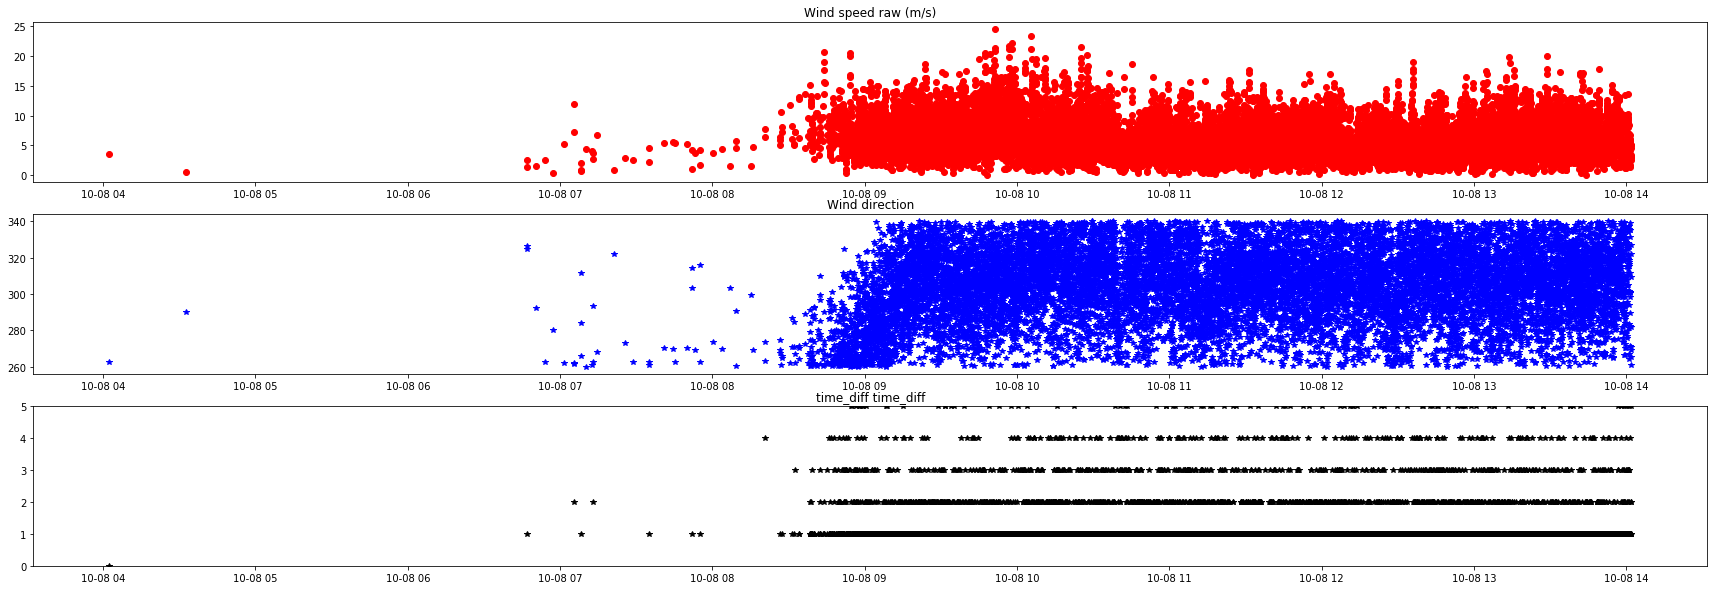

In [16]:
# 2016MATTHEWT2,SC	300
dx = 40
ch_dir = 300

fl_name = '2016_Matthew_T2_Charleston_SC'
full_path = join(dir_path, fl_name)
gl_pd = dec_fcmp_dir(station_dir=full_path, format_type='format_2')

gl_pd = plot_all(fl_name=fl_name, full_path=full_path, out_dir=out_dir, 
                 gl_pd=gl_pd, ch_dir=ch_dir, dx=dx)

In [17]:
# 2016-10-08 11:23:27
start_time=datetime(2016,10,8,11,23,27)
gl_pd = plot_1min(start_time=start_time, fl_name=fl_name, full_path=full_path, out_dir=out_dir, gl_pd=gl_pd, height='10', time_inc=60)

In [18]:
height='5'
heuristic=False
z0 = roughness_es(gl_pd=gl_pd, height=height, heuristic=heuristic)
print('5 z0: ', z0)
roughness_out(filename=filename_out, z0=z0, dx=dx, ch_dir=ch_dir, 
              fl_name=fl_name, start_time=start_time, height=height, heuristic=heuristic, append=True)

height='7.5'
heuristic=False
z0 = roughness_es(gl_pd=gl_pd, height=height, heuristic=heuristic)
print('7.5 z0: ', z0)
roughness_out(filename=filename_out, z0=z0, dx=dx, ch_dir=ch_dir, 
              fl_name=fl_name, start_time=start_time, height=height, heuristic=heuristic, append=True)

height='10'
heuristic=False
z0 = roughness_es(gl_pd=gl_pd, height=height, heuristic=heuristic)
print('10 z0: ', z0)
roughness_out(filename=filename_out, z0=z0, dx=dx, ch_dir=ch_dir, 
              fl_name=fl_name, start_time=start_time, height=height, heuristic=heuristic, append=True)

height='12.5'
heuristic=False
z0 = roughness_es(gl_pd=gl_pd, height=height, heuristic=heuristic)
print('12.5 z0: ', z0)
roughness_out(filename=filename_out, z0=z0, dx=dx, ch_dir=ch_dir, 
              fl_name=fl_name, start_time=start_time, height=height, heuristic=heuristic, append=True)

height='15'
heuristic=False
z0 = roughness_es(gl_pd=gl_pd, height=height, heuristic=heuristic)
print('12.5 z0: ', z0)
roughness_out(filename=filename_out, z0=z0, dx=dx, ch_dir=ch_dir, 
              fl_name=fl_name, start_time=start_time, height=height, heuristic=heuristic, append=True)

5 z0:  1.3957346117860037
7.5 z0:  1.977858923941344
10 z0:  2.619877605041329
12.5 z0:  nan
12.5 z0:  2.172707206569472


Printing the 60 sec intervals
60 2016-10-06 22:27:08.569998 [6621, 6681]


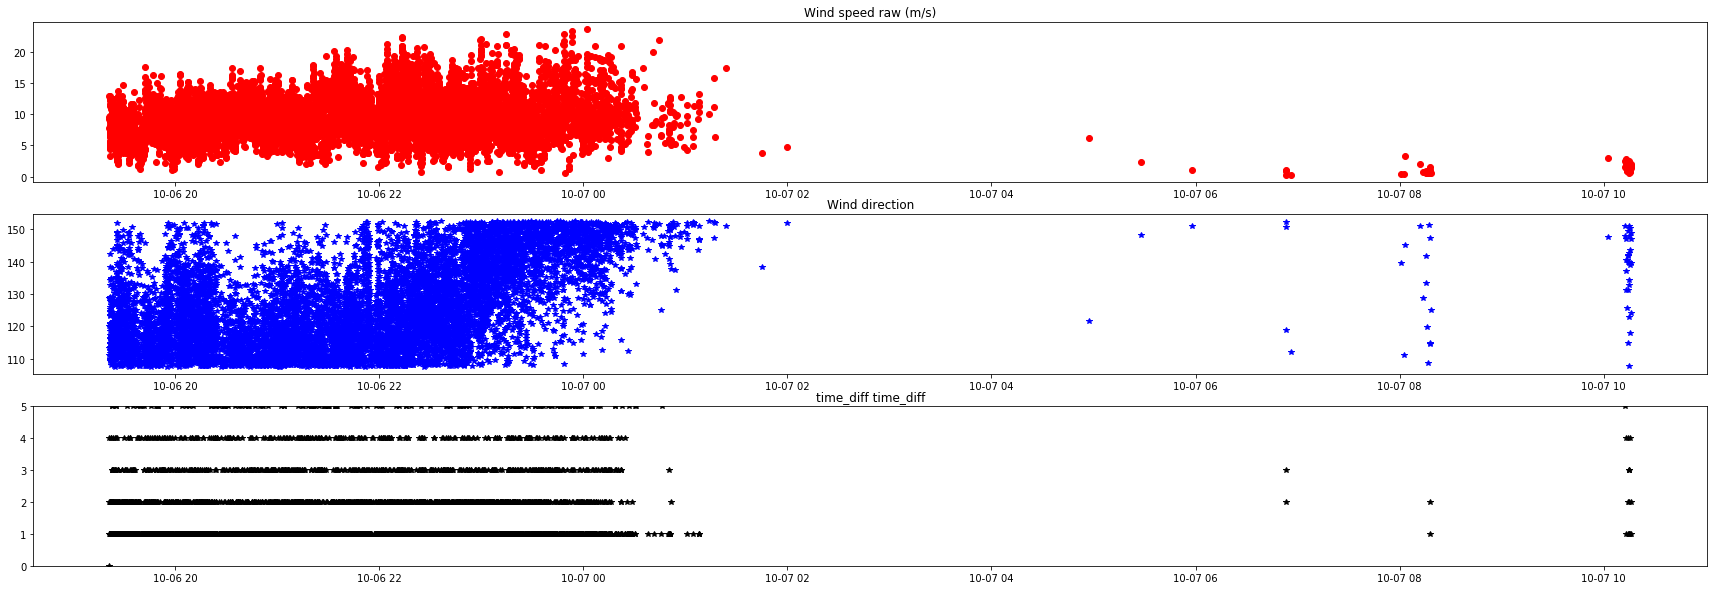

In [19]:
# 2016MATTHEWT2,FL	130
dx = 22.5
ch_dir = 130

fl_name = '2016_Matthew_T2_Stuart_FL'
full_path = join(dir_path, fl_name)
gl_pd = dec_fcmp_dir(station_dir=full_path, format_type='format_2')

gl_pd = plot_all(fl_name=fl_name, full_path=full_path, out_dir=out_dir, 
                 gl_pd=gl_pd, ch_dir=ch_dir, dx=dx)

In [20]:
# 2016-10-06 22:27:08.569998
start_time=datetime(2016,10,6,22,27,8)
gl_pd = plot_1min(start_time=start_time, fl_name=fl_name, full_path=full_path, out_dir=out_dir, gl_pd=gl_pd, height='10', time_inc=60)

In [21]:
height='5'
heuristic=False
z0 = roughness_es(gl_pd=gl_pd, height=height, heuristic=heuristic)
print('5 z0: ', z0)
roughness_out(filename=filename_out, z0=z0, dx=dx, ch_dir=ch_dir, 
              fl_name=fl_name, start_time=start_time, height=height, heuristic=heuristic, append=True)

height='7.5'
heuristic=False
z0 = roughness_es(gl_pd=gl_pd, height=height, heuristic=heuristic)
print('7.5 z0: ', z0)
roughness_out(filename=filename_out, z0=z0, dx=dx, ch_dir=ch_dir, 
              fl_name=fl_name, start_time=start_time, height=height, heuristic=heuristic, append=True)

height='10'
heuristic=False
z0 = roughness_es(gl_pd=gl_pd, height=height, heuristic=heuristic)
print('10 z0: ', z0)
roughness_out(filename=filename_out, z0=z0, dx=dx, ch_dir=ch_dir, 
              fl_name=fl_name, start_time=start_time, height=height, heuristic=heuristic, append=True)

height='12.5'
heuristic=False
z0 = roughness_es(gl_pd=gl_pd, height=height, heuristic=heuristic)
print('12.5 z0: ', z0)
roughness_out(filename=filename_out, z0=z0, dx=dx, ch_dir=ch_dir, 
              fl_name=fl_name, start_time=start_time, height=height, heuristic=heuristic, append=True)

height='15'
heuristic=False
z0 = roughness_es(gl_pd=gl_pd, height=height, heuristic=heuristic)
print('12.5 z0: ', z0)
roughness_out(filename=filename_out, z0=z0, dx=dx, ch_dir=ch_dir, 
              fl_name=fl_name, start_time=start_time, height=height, heuristic=heuristic, append=True)

5 z0:  0.9975655245315123
7.5 z0:  1.5063105433130055
10 z0:  2.045852285234137
12.5 z0:  2.507091177317636
12.5 z0:  2.6972176991060426


An exception occurred:  C:\Users\gkaka\Dropbox\LULC_project\task_2\data_v\2016_Matthew_T3_Satellite_Beach_FL\Matthew_2016_T3 Satellite Beach, FL_10Hz_001H.mat
An exception occurred:  C:\Users\gkaka\Dropbox\LULC_project\task_2\data_v\2016_Matthew_T3_Satellite_Beach_FL\Matthew_2016_T3 Satellite Beach, FL_10Hz_001J.mat
An exception occurred:  C:\Users\gkaka\Dropbox\LULC_project\task_2\data_v\2016_Matthew_T3_Satellite_Beach_FL\Matthew_2016_T3 Satellite Beach, FL_10Hz_002H.mat
An exception occurred:  C:\Users\gkaka\Dropbox\LULC_project\task_2\data_v\2016_Matthew_T3_Satellite_Beach_FL\Matthew_2016_T3 Satellite Beach, FL_10Hz_002J.mat
An exception occurred:  C:\Users\gkaka\Dropbox\LULC_project\task_2\data_v\2016_Matthew_T3_Satellite_Beach_FL\Matthew_2016_T3 Satellite Beach, FL_10Hz_003G.mat
An exception occurred:  C:\Users\gkaka\Dropbox\LULC_project\task_2\data_v\2016_Matthew_T3_Satellite_Beach_FL\Matthew_2016_T3 Satellite Beach, FL_10Hz_003H.mat
An exception occurred:  C:\Users\gkaka\Dropbox

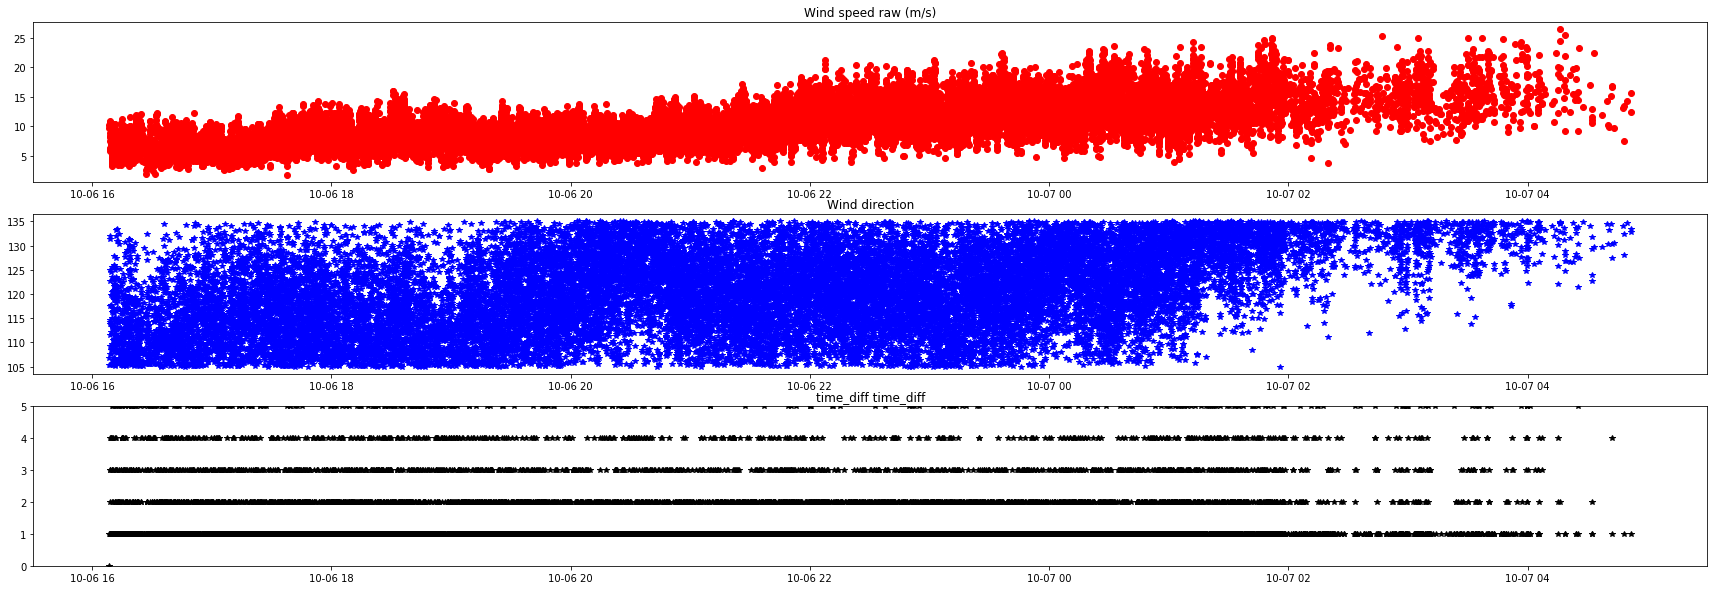

In [22]:
# 2016MATTHEWT3,FL	120
dx = 15
ch_dir = 120


fl_name = '2016_Matthew_T3_Satellite_Beach_FL'
full_path = join(dir_path, fl_name)
gl_pd = dec_fcmp_dir(station_dir=full_path, format_type='format_2')

gl_pd = plot_all(fl_name=fl_name, full_path=full_path, out_dir=out_dir, 
                 gl_pd=gl_pd, ch_dir=ch_dir, dx=dx)

In [23]:
# 2016-10-07 00:32:57
start_time=datetime(2016,10,7,0,32,57)
gl_pd = plot_1min(start_time=start_time, fl_name=fl_name, full_path=full_path, out_dir=out_dir, gl_pd=gl_pd, height='10', time_inc=60)

In [24]:
height='5'
heuristic=False
z0 = roughness_es(gl_pd=gl_pd, height=height, heuristic=heuristic)
print('5 z0: ', z0)
roughness_out(filename=filename_out, z0=z0, dx=dx, ch_dir=ch_dir, 
              fl_name=fl_name, start_time=start_time, height=height, heuristic=heuristic, append=True)

height='7.5'
heuristic=False
z0 = roughness_es(gl_pd=gl_pd, height=height, heuristic=heuristic)
print('7.5 z0: ', z0)
roughness_out(filename=filename_out, z0=z0, dx=dx, ch_dir=ch_dir, 
              fl_name=fl_name, start_time=start_time, height=height, heuristic=heuristic, append=True)

height='10'
heuristic=False
z0 = roughness_es(gl_pd=gl_pd, height=height, heuristic=heuristic)
print('10 z0: ', z0)
roughness_out(filename=filename_out, z0=z0, dx=dx, ch_dir=ch_dir, 
              fl_name=fl_name, start_time=start_time, height=height, heuristic=heuristic, append=True)

height='12.5'
heuristic=False
z0 = roughness_es(gl_pd=gl_pd, height=height, heuristic=heuristic)
print('12.5 z0: ', z0)
roughness_out(filename=filename_out, z0=z0, dx=dx, ch_dir=ch_dir, 
              fl_name=fl_name, start_time=start_time, height=height, heuristic=heuristic, append=True)

height='15'
heuristic=False
z0 = roughness_es(gl_pd=gl_pd, height=height, heuristic=heuristic)
print('12.5 z0: ', z0)
roughness_out(filename=filename_out, z0=z0, dx=dx, ch_dir=ch_dir, 
              fl_name=fl_name, start_time=start_time, height=height, heuristic=heuristic, append=True)

5 z0:  nan
7.5 z0:  0.3907999721749763
10 z0:  0.5722812508574866
12.5 z0:  nan
12.5 z0:  0.6496895968961489


Printing the 60 sec intervals
60 2017-09-11 04:45:50.630000 [971, 1031]
60 2017-09-11 04:45:51.630000 [972, 1032]
60 2017-09-11 04:45:52.630000 [973, 1033]
60 2017-09-11 04:45:53.630000 [974, 1034]
60 2017-09-11 04:45:54.630000 [975, 1035]
60 2017-09-11 04:45:55.630000 [976, 1036]
60 2017-09-11 04:45:56.630000 [977, 1037]
60 2017-09-11 04:45:57.630000 [978, 1038]
60 2017-09-11 04:45:58.630000 [979, 1039]
60 2017-09-11 04:45:59.630000 [980, 1040]
60 2017-09-11 04:46:00.630000 [981, 1041]
60 2017-09-11 04:46:01.630000 [982, 1042]
60 2017-09-11 04:46:02.630000 [983, 1043]
60 2017-09-11 04:46:03.630000 [984, 1044]
60 2017-09-11 10:46:00.630000 [8444, 8504]
60 2017-09-11 10:46:01.630000 [8445, 8505]
60 2017-09-11 12:23:21.730003 [9596, 9656]
60 2017-09-11 12:23:22.730003 [9597, 9657]
60 2017-09-11 12:23:23.730003 [9598, 9658]
60 2017-09-11 12:23:24.730003 [9599, 9659]
60 2017-09-11 12:23:25.730003 [9600, 9660]
60 2017-09-11 12:23:26.730003 [9601, 9661]
60 2017-09-11 12:23:27.730003 [9602, 9

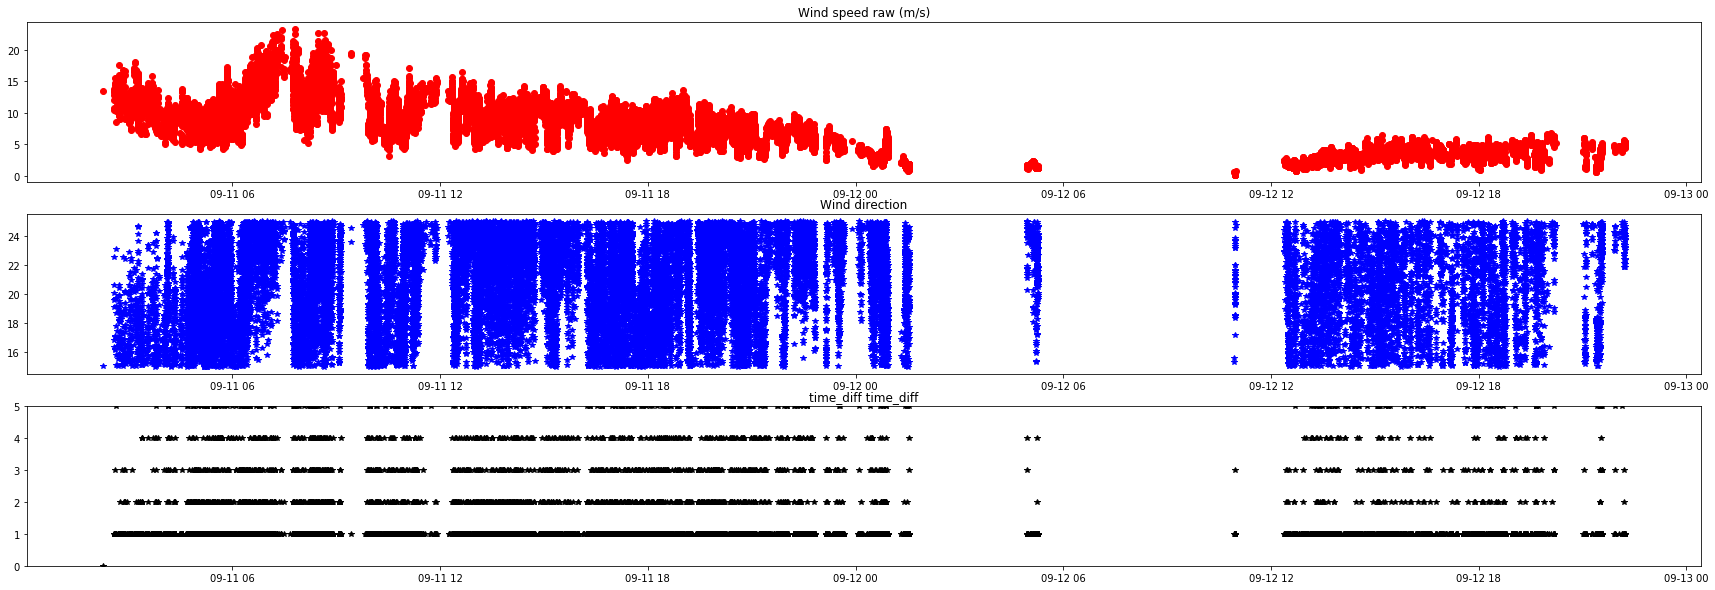

In [25]:
# 2017IRMAT1	20
dx = 5
ch_dir = 20

fl_name = '2017_Irma_T1'
full_path = join(dir_path, fl_name)
gl_pd = dec_fcmp_dir(station_dir=full_path, format_type='format_3')

gl_pd = plot_all(fl_name=fl_name, full_path=full_path, out_dir=out_dir, 
                 gl_pd=gl_pd, ch_dir=ch_dir, dx=dx, height='10')

In [26]:
# 2017-09-11 10:46:00
start_time=datetime(2017,9,11,10,46,0)
gl_pd = plot_1min(start_time=start_time, fl_name=fl_name, full_path=full_path, out_dir=out_dir, gl_pd=gl_pd, height='10', time_inc=60)

In [27]:
height='5'
heuristic=False
z0 = roughness_es(gl_pd=gl_pd, height=height, heuristic=heuristic)
print('5 z0: ', z0)
roughness_out(filename=filename_out, z0=z0, dx=dx, ch_dir=ch_dir, 
              fl_name=fl_name, start_time=start_time, height=height, heuristic=heuristic, append=True)

height='7.5'
heuristic=False
z0 = roughness_es(gl_pd=gl_pd, height=height, heuristic=heuristic)
print('7.5 z0: ', z0)
roughness_out(filename=filename_out, z0=z0, dx=dx, ch_dir=ch_dir, 
              fl_name=fl_name, start_time=start_time, height=height, heuristic=heuristic, append=True)

height='10'
heuristic=False
z0 = roughness_es(gl_pd=gl_pd, height=height, heuristic=heuristic)
print('10 z0: ', z0)
roughness_out(filename=filename_out, z0=z0, dx=dx, ch_dir=ch_dir, 
              fl_name=fl_name, start_time=start_time, height=height, heuristic=heuristic, append=True)

height='12.5'
heuristic=False
z0 = roughness_es(gl_pd=gl_pd, height=height, heuristic=heuristic)
print('12.5 z0: ', z0)
roughness_out(filename=filename_out, z0=z0, dx=dx, ch_dir=ch_dir, 
              fl_name=fl_name, start_time=start_time, height=height, heuristic=heuristic, append=True)

height='15'
heuristic=False
z0 = roughness_es(gl_pd=gl_pd, height=height, heuristic=heuristic)
print('12.5 z0: ', z0)
roughness_out(filename=filename_out, z0=z0, dx=dx, ch_dir=ch_dir, 
              fl_name=fl_name, start_time=start_time, height=height, heuristic=heuristic, append=True)

5 z0:  0.0011243777459357313
7.5 z0:  nan
10 z0:  8.558517684642411e-12
12.5 z0:  nan
12.5 z0:  nan


Printing the 60 sec intervals
60 2017-09-10 19:01:26.640000 [31, 91]
60 2017-09-10 19:01:27.640000 [32, 92]
60 2017-09-10 19:01:28.640000 [33, 93]
60 2017-09-10 19:07:03.640000 [344, 404]
60 2017-09-10 19:07:04.640000 [345, 405]
60 2017-09-10 19:07:05.640000 [346, 406]
60 2017-09-10 19:07:06.640000 [347, 407]
60 2017-09-10 19:07:07.640000 [348, 408]
60 2017-09-10 19:07:08.640000 [349, 409]
60 2017-09-10 19:07:09.640000 [350, 410]
60 2017-09-10 19:07:10.640000 [351, 411]
60 2017-09-10 19:07:11.640000 [352, 412]
60 2017-09-10 19:07:12.640000 [353, 413]
60 2017-09-10 19:07:13.640000 [354, 414]
60 2017-09-10 19:07:14.640000 [355, 415]
60 2017-09-10 19:07:15.640000 [356, 416]
60 2017-09-10 19:07:16.640000 [357, 417]
60 2017-09-10 19:09:56.640000 [504, 564]
60 2017-09-10 19:09:57.640000 [505, 565]
60 2017-09-10 19:20:54.749996 [1107, 1167]
60 2017-09-10 19:29:12.749996 [1573, 1633]
60 2017-09-10 19:29:13.749996 [1574, 1634]
60 2017-09-10 19:32:09.839996 [1733, 1793]
60 2017-09-10 19:32:10.83

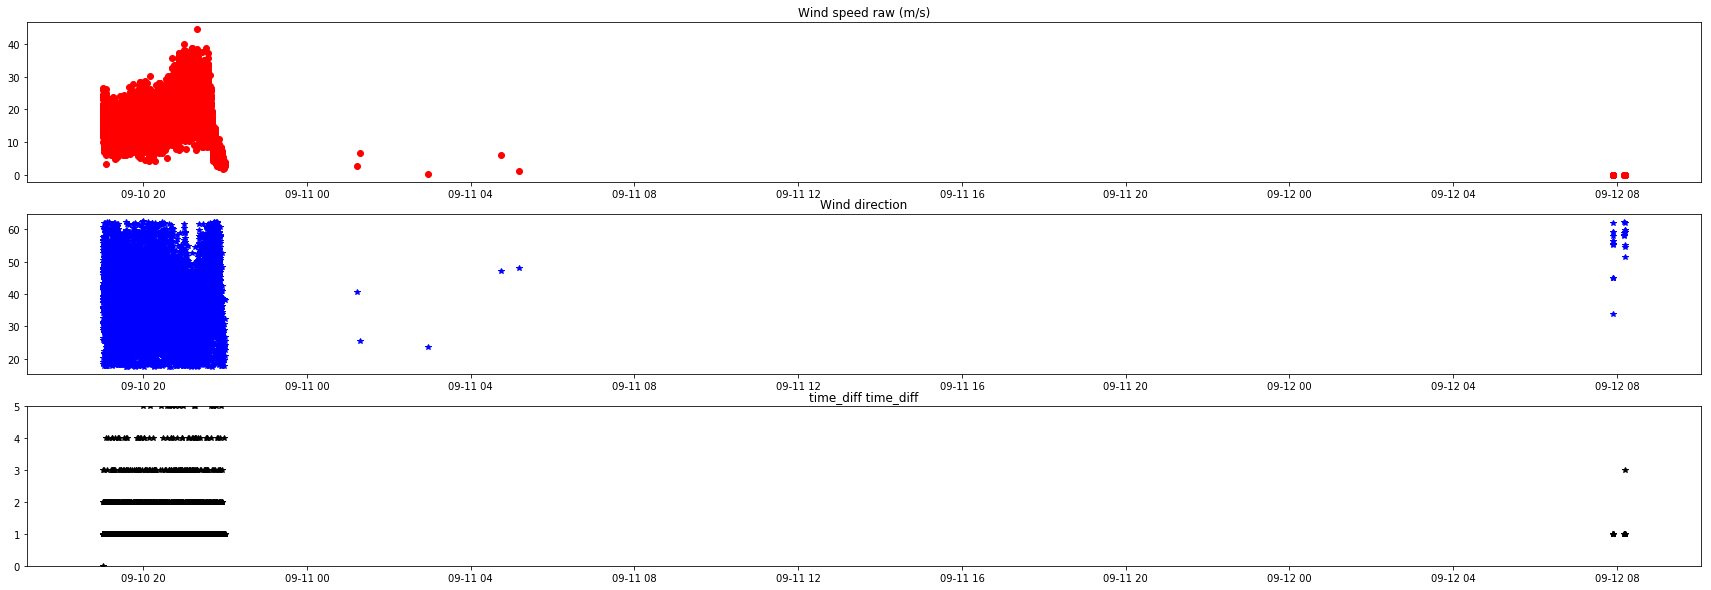

In [28]:
# 2017IRMAT2	40 or 24
dx = 22.5
ch_dir = 40


fl_name = '2017_Irma_T2'
full_path = join(dir_path, fl_name)
gl_pd = dec_fcmp_dir(station_dir=full_path, format_type='format_1')

gl_pd = plot_all(fl_name=fl_name, full_path=full_path, out_dir=out_dir, 
                 gl_pd=gl_pd, ch_dir=ch_dir, dx=dx)

In [29]:
# 2017-09-10 20:19:30
start_time=datetime(2017,9,10,20,19,30)
gl_pd = plot_1min(start_time=start_time, fl_name=fl_name, full_path=full_path, out_dir=out_dir, gl_pd=gl_pd, height='10', time_inc=60)

In [30]:
height='5'
heuristic=False
z0 = roughness_es(gl_pd=gl_pd, height=height, heuristic=heuristic)
print('5 z0: ', z0)
roughness_out(filename=filename_out, z0=z0, dx=dx, ch_dir=ch_dir, 
              fl_name=fl_name, start_time=start_time, height=height, heuristic=heuristic, append=True)

height='7.5'
heuristic=False
z0 = roughness_es(gl_pd=gl_pd, height=height, heuristic=heuristic)
print('7.5 z0: ', z0)
roughness_out(filename=filename_out, z0=z0, dx=dx, ch_dir=ch_dir, 
              fl_name=fl_name, start_time=start_time, height=height, heuristic=heuristic, append=True)

height='10'
heuristic=False
z0 = roughness_es(gl_pd=gl_pd, height=height, heuristic=heuristic)
print('10 z0: ', z0)
roughness_out(filename=filename_out, z0=z0, dx=dx, ch_dir=ch_dir, 
              fl_name=fl_name, start_time=start_time, height=height, heuristic=heuristic, append=True)

height='12.5'
heuristic=False
z0 = roughness_es(gl_pd=gl_pd, height=height, heuristic=heuristic)
print('12.5 z0: ', z0)
roughness_out(filename=filename_out, z0=z0, dx=dx, ch_dir=ch_dir, 
              fl_name=fl_name, start_time=start_time, height=height, heuristic=heuristic, append=True)

height='15'
heuristic=False
z0 = roughness_es(gl_pd=gl_pd, height=height, heuristic=heuristic)
print('12.5 z0: ', z0)
roughness_out(filename=filename_out, z0=z0, dx=dx, ch_dir=ch_dir, 
              fl_name=fl_name, start_time=start_time, height=height, heuristic=heuristic, append=True)

5 z0:  0.004296916159933798
7.5 z0:  0.06701727665208686
10 z0:  0.09548640894846804
12.5 z0:  nan
12.5 z0:  nan


Printing the 60 sec intervals
60 2017-09-11 16:33:02.849999 [27532, 27592]
60 2017-09-12 03:07:46.109999 [50557, 50617]
60 2017-09-12 03:07:47.109999 [50558, 50618]
60 2017-09-12 03:07:48.109999 [50559, 50619]
60 2017-09-12 03:07:49.109999 [50560, 50620]
60 2017-09-12 03:07:50.109999 [50561, 50621]
60 2017-09-12 03:07:51.109999 [50562, 50622]
60 2017-09-12 03:07:52.109999 [50563, 50623]
60 2017-09-12 03:07:53.109999 [50564, 50624]
60 2017-09-12 03:07:54.109999 [50565, 50625]
60 2017-09-12 03:07:55.109999 [50566, 50626]
60 2017-09-12 03:07:56.109999 [50567, 50627]
60 2017-09-12 06:50:17.509996 [55833, 55893]
60 2017-09-12 06:50:18.509996 [55834, 55894]
60 2017-09-12 06:50:19.509996 [55835, 55895]
60 2017-09-12 06:50:20.509996 [55836, 55896]
60 2017-09-12 06:50:21.509996 [55837, 55897]
60 2017-09-12 06:50:22.509996 [55838, 55898]
60 2017-09-12 06:50:23.509996 [55839, 55899]
60 2017-09-12 06:50:24.509996 [55840, 55900]
60 2017-09-12 06:50:25.509996 [55841, 55901]
60 2017-09-12 06:50:26.50

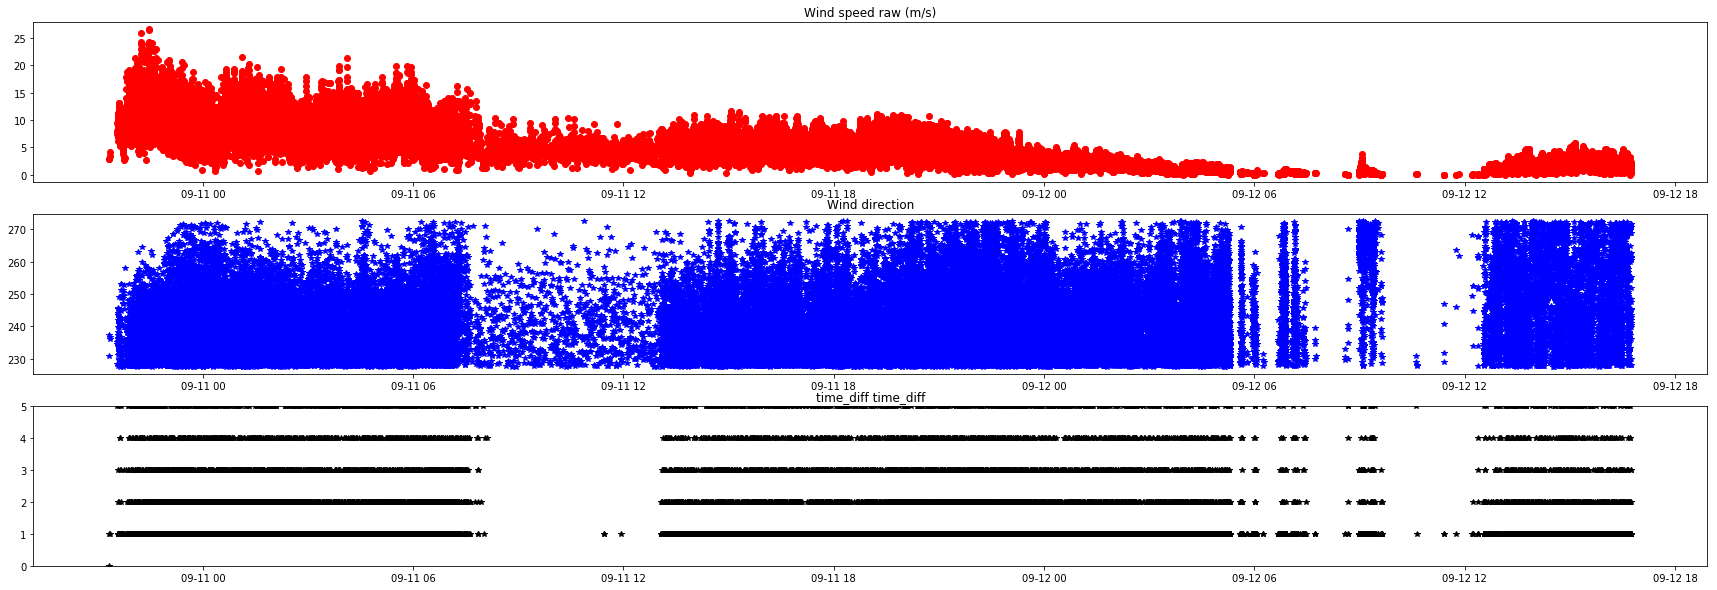

In [31]:
# 2017IRMAT3	50 or 250
dx = 22.5
ch_dir = 250

fl_name = '2017_Irma_T3'
full_path = join(dir_path, fl_name)
gl_pd = dec_fcmp_dir(station_dir=full_path, format_type='format_1')

gl_pd = plot_all(fl_name=fl_name, full_path=full_path, out_dir=out_dir, 
                 gl_pd=gl_pd, ch_dir=ch_dir, dx=dx, height='5')

In [32]:
# 2017-09-12 03:07:47
start_time=datetime(2017,9,12,3,7,47)
gl_pd = plot_1min(start_time=start_time, fl_name=fl_name, full_path=full_path, out_dir=out_dir, gl_pd=gl_pd, height='5', time_inc=60)

In [33]:
height='5'
heuristic=False
z0 = roughness_es(gl_pd=gl_pd, height=height, heuristic=heuristic)
print('5 z0: ', z0)
roughness_out(filename=filename_out, z0=z0, dx=dx, ch_dir=ch_dir, 
              fl_name=fl_name, start_time=start_time, height=height, heuristic=heuristic, append=True)

height='7.5'
heuristic=False
z0 = roughness_es(gl_pd=gl_pd, height=height, heuristic=heuristic)
print('7.5 z0: ', z0)
roughness_out(filename=filename_out, z0=z0, dx=dx, ch_dir=ch_dir, 
              fl_name=fl_name, start_time=start_time, height=height, heuristic=heuristic, append=True)

height='10'
heuristic=False
z0 = roughness_es(gl_pd=gl_pd, height=height, heuristic=heuristic)
print('10 z0: ', z0)
roughness_out(filename=filename_out, z0=z0, dx=dx, ch_dir=ch_dir, 
              fl_name=fl_name, start_time=start_time, height=height, heuristic=heuristic, append=True)

height='12.5'
heuristic=False
z0 = roughness_es(gl_pd=gl_pd, height=height, heuristic=heuristic)
print('12.5 z0: ', z0)
roughness_out(filename=filename_out, z0=z0, dx=dx, ch_dir=ch_dir, 
              fl_name=fl_name, start_time=start_time, height=height, heuristic=heuristic, append=True)

height='15'
heuristic=False
z0 = roughness_es(gl_pd=gl_pd, height=height, heuristic=heuristic)
print('12.5 z0: ', z0)
roughness_out(filename=filename_out, z0=z0, dx=dx, ch_dir=ch_dir, 
              fl_name=fl_name, start_time=start_time, height=height, heuristic=heuristic, append=True)

5 z0:  0.0405827683995989
7.5 z0:  nan
10 z0:  nan
12.5 z0:  0.04134460941463838
12.5 z0:  nan


Printing the 60 sec intervals
60 2017-09-10 17:11:02.240001 [12454, 12514]
60 2017-09-10 17:11:03.240001 [12455, 12515]
60 2017-09-10 17:11:04.240001 [12456, 12516]
60 2017-09-10 17:11:05.240001 [12457, 12517]
60 2017-09-10 17:11:06.240001 [12458, 12518]
60 2017-09-10 17:11:07.240001 [12459, 12519]
60 2017-09-10 17:11:08.240001 [12460, 12520]
60 2017-09-10 17:11:09.240001 [12461, 12521]
60 2017-09-10 17:11:10.240001 [12462, 12522]
60 2017-09-10 17:11:11.240001 [12463, 12523]
60 2017-09-10 17:11:12.240001 [12464, 12524]
60 2017-09-10 17:11:13.240001 [12465, 12525]
60 2017-09-10 17:11:14.240001 [12466, 12526]
60 2017-09-10 17:11:15.240001 [12467, 12527]
60 2017-09-10 17:46:31.640001 [14244, 14304]
60 2017-09-10 17:46:32.640001 [14245, 14305]
60 2017-09-10 17:46:33.640001 [14246, 14306]
60 2017-09-10 17:46:34.640001 [14247, 14307]
60 2017-09-10 17:46:35.640001 [14248, 14308]
60 2017-09-10 17:46:36.640001 [14249, 14309]
60 2017-09-10 17:46:37.640001 [14250, 14310]
60 2017-09-10 17:46:38.64

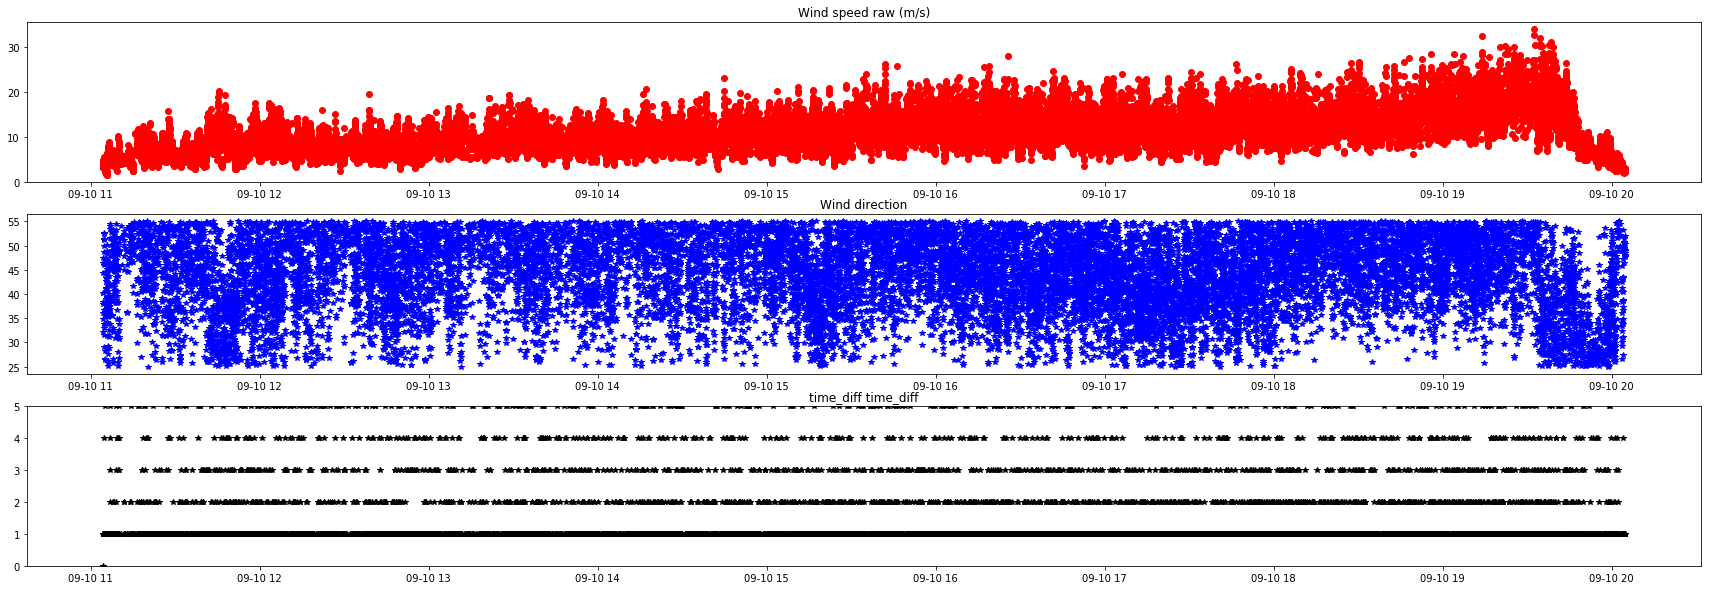

In [34]:
# 2017IRMAT5	40
dx = 15
ch_dir = 40

fl_name = '2017_Irma_T5'
full_path = join(dir_path, fl_name)
gl_pd = dec_fcmp_dir(station_dir=full_path, format_type='format_3')

gl_pd = plot_all(fl_name=fl_name, full_path=full_path, out_dir=out_dir, 
                 gl_pd=gl_pd, ch_dir=ch_dir, dx=dx, height='5')

In [35]:
# 2017-09-10 17:46:48
start_time=datetime(2017,9,10,17,46,48)
gl_pd = plot_1min(start_time=start_time, fl_name=fl_name, full_path=full_path, out_dir=out_dir, gl_pd=gl_pd, height='5', time_inc=60)

In [36]:
height='5'
heuristic=False
z0 = roughness_es(gl_pd=gl_pd, height=height, heuristic=heuristic)
print('5 z0: ', z0)
roughness_out(filename=filename_out, z0=z0, dx=dx, ch_dir=ch_dir, 
              fl_name=fl_name, start_time=start_time, height=height, heuristic=heuristic, append=True)

height='7.5'
heuristic=False
z0 = roughness_es(gl_pd=gl_pd, height=height, heuristic=heuristic)
print('7.5 z0: ', z0)
roughness_out(filename=filename_out, z0=z0, dx=dx, ch_dir=ch_dir, 
              fl_name=fl_name, start_time=start_time, height=height, heuristic=heuristic, append=True)

height='10'
heuristic=False
z0 = roughness_es(gl_pd=gl_pd, height=height, heuristic=heuristic)
print('10 z0: ', z0)
roughness_out(filename=filename_out, z0=z0, dx=dx, ch_dir=ch_dir, 
              fl_name=fl_name, start_time=start_time, height=height, heuristic=heuristic, append=True)

height='12.5'
heuristic=False
z0 = roughness_es(gl_pd=gl_pd, height=height, heuristic=heuristic)
print('12.5 z0: ', z0)
roughness_out(filename=filename_out, z0=z0, dx=dx, ch_dir=ch_dir, 
              fl_name=fl_name, start_time=start_time, height=height, heuristic=heuristic, append=True)

height='15'
heuristic=False
z0 = roughness_es(gl_pd=gl_pd, height=height, heuristic=heuristic)
print('12.5 z0: ', z0)
roughness_out(filename=filename_out, z0=z0, dx=dx, ch_dir=ch_dir, 
              fl_name=fl_name, start_time=start_time, height=height, heuristic=heuristic, append=True)

5 z0:  0.0758819658954061
7.5 z0:  nan
10 z0:  0.23621384710344656
12.5 z0:  nan
12.5 z0:  nan


In [37]:
# filename = r'C:\Users\gkaka\Dropbox\LULC_project\task_2\data\2017_Irma_T1\Irma_2017_T1_1sec_154.mat'
# mat = mat4py.loadmat(filename)